PH3022- Machine Learning and Neural Computation- Assignment 1

1

a. Training set: The training set is the part of the data used to teach the machine learning model how to make predictions.

b. Validation set: The validation set is used to tune model settings(hyperparameters) and to check how well the model performs during training.

c. Test set: The test is used to evaluate the final performance of the trained model to see how well it works on new data.

2

a. Underfitting: Underfitting happens when the model is too simple and cannot learn the patterns in the data. This results in low accuracy on both training and testing data.

b. Overfitting: Overfitting happens when the model learns the training data too well, including noise. This results in high accuracy on training data but poor performance on testing data.

3

a. Random splitting ensures that the training and testing sets fairely represent the whole dataset. This reduces bias and improves model accuracy.

b."train_test_split()" is used to divide the data into training and testing parts. It takes input features (X) and target values (y) and returns "X_train, X_test, y_train and y_test"

c."test_size" decides what portion of the data is used for testing (e.g., test_size=0.2 means 20% test, 80% train)

d.

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([2, 4, 6, 8,10, 12])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X_train: ", X_train)
print("X_test: ", X_test)
print("y_train: ", y_train)
print("y_test: ", y_test)

X_train:  [[5]
 [1]
 [4]
 [6]]
X_test:  [[3]
 [2]]
y_train:  [10  2  8 12]
y_test:  [6 4]


4

a. The Boston Housing dataset contains information about houses in Boston. The goal is to predict the median house price. 

<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>Label</th>
      <th>Meaning</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>CRIM</td><td>Crime rate per town</td></tr>
    <tr><td>ZN</td><td>% of land for large homes</td></tr>
    <tr><td>INDUS</td><td>% of non-retail business acres</td></tr>
    <tr><td>CHAS</td><td>1 if near the Charles River, otherwise 0</td></tr>
    <tr><td>NOX</td><td>Air pollution level (nitric oxides concentration)</td></tr>
    <tr><td>RM</td><td>Average number of rooms per dwelling</td></tr>
    <tr><td>AGE</td><td>% of owner-occupied units built prior to 1940 (older houses)</td></tr>
    <tr><td>DIS</td><td>Weighted distances to five Boston employment centres</td></tr>
    <tr><td>RAD</td><td>Index of accessibility to radial highways</td></tr>
    <tr><td>TAX</td><td>Full-value property-tax rate per 10,000 dollars</td></tr>
    <tr><td>PTRATIO</td><td>Student–teacher ratio by town</td></tr>
    <tr><td>B</td><td>1000(Bk - 0.63)^2 where Bk is proportion of Black residents</td></tr>
    <tr><td>LSTAT</td><td>% lower status of the population (lower-income %) </td></tr>
    <tr><td><strong>MEDV</strong></td><td><strong>Target — Median value of owner-occupied homes (in $1000s)</strong></td></tr>
  </tbody>
</table>

b.

i, ii, iii, iv, v, vi, vii, viii, ix

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.

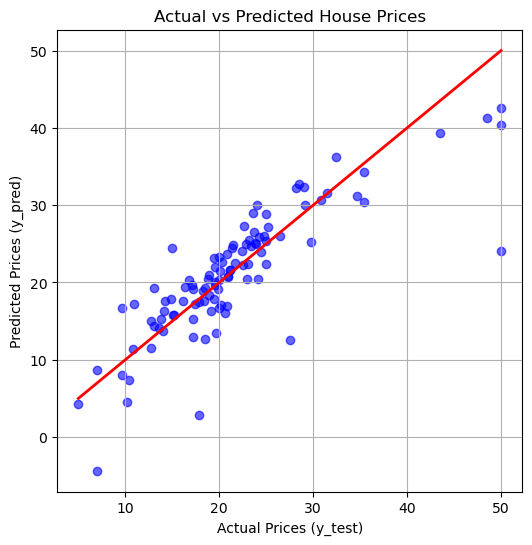

Training MSE: 22.60
Testing MSE: 22.78

Model has balanced performance — no major overfitting or underfitting.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston Housing Dataset
data_url = "https://gist.githubusercontent.com/nnbphuong/def91b5553736764e8e08f6255390f37/raw/373a856a3c9c1119e34b344de9230ae2ea89569d/BostonHousing.csv"
df = pd.read_csv(data_url)
df = df.drop("CAT. MEDV", axis=1)
print(df)

# Extract the features (X) and target (y)
X = df.drop("MEDV", axis=1)  
y = df["MEDV"]          

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape, "\n")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape, "\n")

# Develop a Linear Regression Model
model = LinearRegression()

# Train the Linear Regression Model
model.fit(X_train, y_train)

# Predict target values (y_pred) for the test set
y_pred = model.predict(X_test)

# Evaluate the Model using MSE and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}\n")

# Plot y_pred vs y_test graph
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2) 
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# Calculate MSE for both training and testing sets
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}\n")

# Comment on the graph
if abs(mse_train - mse_test) < 5:
    print("Model has balanced performance — no major overfitting or underfitting.")
elif mse_train < mse_test:
    print("Model may be slightly overfitting (performs better on training data).")
else:
    print("Model may be underfitting (performs poorly on both training and testing data).")

c.

i, ii

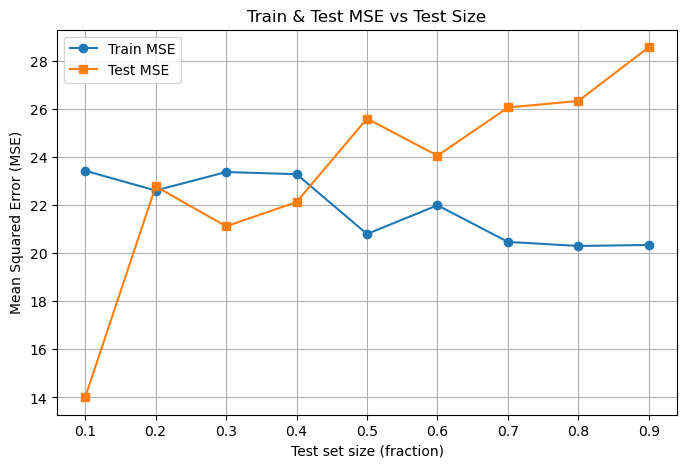

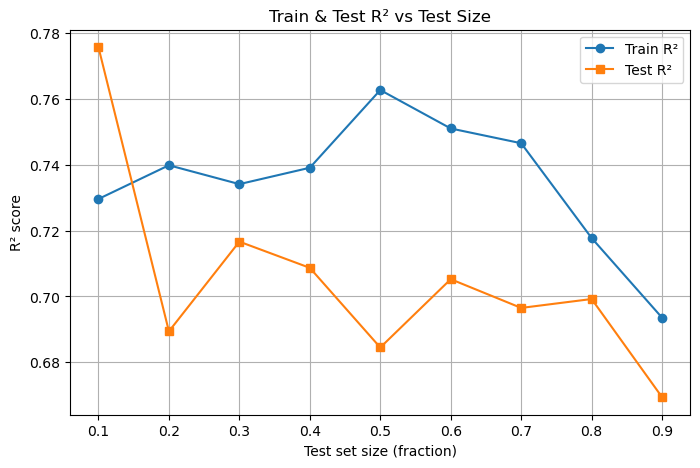


Results by test_size:
   test_size  mse_train  mse_test  r2_train  r2_test
0        0.1     23.426    14.009     0.730    0.776
1        0.2     22.604    22.778     0.740    0.689
2        0.3     23.374    21.115     0.734    0.717
3        0.4     23.284    22.125     0.739    0.709
4        0.5     20.797    25.597     0.763    0.684
5        0.6     21.990    24.053     0.751    0.705
6        0.7     20.467    26.057     0.746    0.697
7        0.8     20.298    26.330     0.718    0.699
8        0.9     20.340    28.563     0.694    0.669


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data_url = "https://gist.githubusercontent.com/nnbphuong/def91b5553736764e8e08f6255390f37/raw/373a856a3c9c1119e34b344de9230ae2ea89569d/BostonHousing.csv"
df = pd.read_csv(data_url)
df = df.drop("CAT. MEDV", axis=1)  

X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Prepare arrays to store results
test_sizes = np.arange(0.1, 1.0, 0.1)   

mse_train_list = []
mse_test_list  = []
r2_train_list  = []
r2_test_list   = []

base_random_state = 42

# Loop for Each Test Size
for i, ts in enumerate(test_sizes):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=ts, random_state=base_random_state
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    mse_train_list.append(mean_squared_error(y_train, y_train_pred))
    mse_test_list.append(mean_squared_error(y_test, y_test_pred))
    r2_train_list.append(r2_score(y_train, y_train_pred))
    r2_test_list.append(r2_score(y_test, y_test_pred))

# Plot MSE vs test_size
plt.figure(figsize=(8,5))
plt.plot(test_sizes, mse_train_list, marker='o', label='Train MSE')
plt.plot(test_sizes, mse_test_list,  marker='s', label='Test MSE')
plt.xlabel('Test set size (fraction)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train & Test MSE vs Test Size')
plt.legend()
plt.grid(True)
plt.show()

# Plot R² vs test_size
plt.figure(figsize=(8,5))
plt.plot(test_sizes, r2_train_list, marker='o', label='Train R²')
plt.plot(test_sizes, r2_test_list,  marker='s', label='Test R²')
plt.xlabel('Test set size (fraction)')
plt.ylabel('R² score')
plt.title('Train & Test R² vs Test Size')
plt.legend()
plt.grid(True)
plt.show()

# Print the numeric results in a table
results = pd.DataFrame({
    'test_size': test_sizes,
    'mse_train': mse_train_list,
    'mse_test' : mse_test_list,
    'r2_train' : r2_train_list,
    'r2_test'  : r2_test_list
})
print("\nResults by test_size:")
print(results.round(3))